<a href="https://colab.research.google.com/github/ergaspar/PLN-SVM-BOW-EMBEDDINGS-BERT/blob/main/Visao_Computacional_Projeto_Final_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------------------------------------
# Universidade Federal de Pernanbuco - UFPE
# Centro de Informatica CIn
## Especialização em Deep Learning
## Disciplina: Visão Computacional - Projeto Final
## Professor: Tsang Ing Ren
## Monitor: Jose Gabriel Ferreira Tavares
# Aluno: Eduardo Rubens Gaspar (equipe de 1 elemento apenas)
# Projeto escolhido: B. Classificação de Emoções
--------------------------------------------------------------------------------

# Etapas do projeto:

## 1.0 Salvar o dataset FER2013 (Facial Expression Recognition 2013) no google drive

## 1.1 Com ajuda do ChatGPT criar um código inicial com um modelo próprio na seguinte configuração:

O modelo tem 4 Camadas Convolucionais, 2 Camadas de Maxpooling, 2 Lineares full connect e dropout
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
================================================================

            Conv2d-1           [-1, 32, 48, 48]             320
            Conv2d-2           [-1, 64, 48, 48]          18,496
         MaxPool2d-3           [-1, 64, 24, 24]               0
            Conv2d-4          [-1, 128, 24, 24]          73,856
            Conv2d-5          [-1, 256, 24, 24]         295,168
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Linear-7                  [-1, 128]       4,718,720
           Dropout-8                  [-1, 128]               0
            Linear-9                    [-1, 7]             903

================================================================

Total params: 5,107,463

Trainable params: 5,107,463

Non-trainable params: 0

----------------------------------------------------------------

Inicialmente tive problema com a dimensão da camada flatten, que foi resolvido com:

self.fc1 = nn.Linear(256 * 12 * 12, 128)

## 1.2 Como o processamento estava muito demorado (>4hrs), resolvi retirar o data augmentention.

## 2.0 Alterando a topologia da rede
Com o objetivo de "espremer" o shape do tensor de 12 X 12, para 6 X 6 foi introduzida mais 1 Camada Convolucional aumentando o numero de canais de 256 para 512.

Ficamos então, com 5 Camadas Convolucionais, 3 Camadas Maxpooling, 2 full connect e Dropout

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
================================================================

            Conv2d-1           [-1, 32, 48, 48]             320
            Conv2d-2           [-1, 64, 48, 48]          18,496
         MaxPool2d-3           [-1, 64, 24, 24]               0
            Conv2d-4          [-1, 128, 24, 24]          73,856
            Conv2d-5          [-1, 256, 24, 24]         295,168
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Conv2d-7          [-1, 512, 12, 12]       1,180,160
         MaxPool2d-8            [-1, 512, 6, 6]               0
            Linear-9                  [-1, 128]       2,359,424
          Dropout-10                  [-1, 128]               0
           Linear-11                    [-1, 7]             903
================================================================

Total params: 3,928,327

Trainable params: 3,928,327

Non-trainable params: 0

----------------------------------------------------------------

Podemos notar que com esta arquitetura o número de Parâmetros Treináveis caiu de 5.107.463 para 3.928.327.

Mas podemos observar nos gráficos que houve algum Overfiting

# 2.1 Aumentando o número de épocas de 10 para 15:

Com apenas 10 épocas me pareceu que com um número maior de épocas a convergência continuaria diminuinto a loss em direção a zero, mas o resultado foi muito ruim, além do que o Overfiting aumentou desproporcionalmente.

# 3.0 Adicionando mais uma Camada Convolucional:

A fim de observar como o modelo se comporta diminuindo mais aninda o tensor de 6 X 6 para 3 X 3
 A arquitetura da rede com 6 Camadas Convolucionais, sempre com Kernel de 3 X 3 e com 4 Camadas de Maxpooling, 2 Camadas Lineares e uma de Dropout
 Podemos notar:

 - O número de Parâmetros Treinaveis aumentou
 - O Overfiting também aumentou em relaçâo a configurção anterior de 5 Camadas Convolucionais.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
================================================================

            Conv2d-1           [-1, 32, 48, 48]             320
            Conv2d-2           [-1, 64, 48, 48]          18,496
         MaxPool2d-3           [-1, 64, 24, 24]               0
            Conv2d-4          [-1, 128, 24, 24]          73,856
            Conv2d-5          [-1, 256, 24, 24]         295,168
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Conv2d-7          [-1, 512, 12, 12]       1,180,160
         MaxPool2d-8            [-1, 512, 6, 6]               0
            Conv2d-9            [-1, 512, 6, 6]       2,359,808
        MaxPool2d-10            [-1, 512, 3, 3]               0
           Linear-11                  [-1, 128]         589,952
          Dropout-12                  [-1, 128]               0
           Linear-13                    [-1, 7]             903
================================================================

Total params: 4,518,663

Trainable params: 4,518,663

Non-trainable params: 0

----------------------------------------------------------------

# 4,0 Modelo MobileNetV3 Small

A primeira implementação do MobileNetV3 não produziu resultado algum depois de 8 horas de processamento no Colab com GPU A100.

Sendo assim resolvi introduzir uma medida de tempo entre as épocas que servisse para entender o andamento.

# 4.1 MobileNetV3 com medida de tempo.

# 4.2 Embarcando a MobileNetV3 Small em um Raspberry 4

Com o prósito de  fazer interência de Emoções Faciais em tempo real, foi embarcado em um Raspberry 4 o Modelo MobileNet Small treinado com o dataset FER2013.

Um teste que pareceu interessante sem necessitar de um dataset empecífico que serve para observar o comportamento do modelo no mundo real.

Usando o meu proprio rosto e fazendo expressões exageradas é possível notar a classificação correta e os eganos do modelo.

Inicialmente o resultado foi ruim errando mais do que acertando, então vamos tentar melhorar a etapa de treinamento.

A idéia inicial para captura das imagens:

- A WebCam tem uma resolução de 1280 X 720 pixels a 30 FPF,

- A fim de não distorcer a imagem pela diferença da razão de aspecto entre a camera e a entrada do modelo, a ideia é fazer um crop 720 no centro da imagem, assim o shape da imagem não é dilatado ou comprimido em apenas um dos eixos.
Isso tem o incoveniente se perder as laterais da imagem mas imagino que exija uma generalização menor.

- Uma outra operação é o resize para ajustar a resolução de 224 X 224,

- Não podemos esquecer que o treinamento foi feito com imagens em tons de cinza, então precisamos introduzir esta transformação tambem.

# 4.3 Melhorando a acurária do MobileNetV3

Introduzindo alguns intens com o objetivo de melhorar a acurácia na inferência:

 - Imagens estão sendo redimensionadas para 224 X 224 a fim de ficar coerente com o modelo MobileNetV3 original
 - Juntando o dataset de Teste para aumentar o número de imagens, separando
 Treinamento 80% e Validação 20%
 - Tentativa de melhorar o balanceamento de classes usando o WeightedRandomSampler

# 5.0 Resuldados dos melhores valores:


Modelo Próprio na seção 2.1:
- Acurácia de Validação: 59.31%

Modelo MobileNetV3 na seção 4.3:
- Acurácia de Validação: 63.97%

Obs.: Não estou postando os vídeos dos testes em tempo real pois estes foram feitos com o meu rosto.







--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
## CÓDIGOS
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 1.0 Modelo Próprio com Data Augmentation

# 1.1 Carregar Dataset

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Caminhos do dataset
train_dir = '/content/drive/MyDrive/Visao-Computacional/FER2013/train'
test_dir = '/content/drive/MyDrive/Visao-Computacional/FER2013/test'

# Transformações para normalização e aumento de dados
# Transformações para os dados de treino
transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Converte para escala de cinza
    transforms.RandomHorizontalFlip(),            # Aumento de dados
    transforms.RandomRotation(10),               # Pequenas rotações
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalização [-1, 1]
])

# Transformações para os dados de teste
transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Converte para escala de cinza
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Carregar os dados usando ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
test_dataset = datasets.ImageFolder(test_dir, transform=transform_test)

# Criar DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Verificar as classes
print(f"Classes encontradas: {train_dataset.classes}")
print(f"Tamanho do conjunto de treino: {len(train_dataset)}")
print(f"Tamanho do conjunto de teste: {len(test_dataset)}")

# Exemplo de um batch
images, labels = next(iter(train_loader))
print(f"Shape das imagens: {images.shape}")
print(f"Shape das labels: {labels.shape}")


Classes encontradas: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Tamanho do conjunto de treino: 28705
Tamanho do conjunto de teste: 7178
Shape das imagens: torch.Size([64, 1, 48, 48])
Shape das labels: torch.Size([64])


# 1.2 Definição do Modelo

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class EmotionCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionCNN, self).__init__()

        # Camadas convolucionais
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)

        # Pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Camadas totalmente conectadas
        self.fc1 = nn.Linear(256 * 12 * 12, 128)  # Corrigido
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)  # 7 classes para emoções

    def forward(self, x):
        # Camadas convolucionais com ReLU e pooling
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))

        # Verificar o shape antes do flatten (opcional para debug)
        print(f"Shape antes do flatten: {x.shape}")

        # Flatten
        x = x.view(x.size(0), -1)

        # Camadas densas
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x


# Instanciando o modelo
num_classes = 7
model = EmotionCNN(num_classes=num_classes)

# Visualizando o modelo
print(model)


EmotionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=36864, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=7, bias=True)
)


In [ ]:
pip install torchsummary


In [ ]:
from torchsummary import summary

# Definir o dispositivo (GPU ou CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Resumo do modelo
summary(model, input_size=(1, 48, 48))  # (canal, altura, largura)


Shape antes do flatten: torch.Size([2, 256, 12, 12])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 48, 48]             320
            Conv2d-2           [-1, 64, 48, 48]          18,496
         MaxPool2d-3           [-1, 64, 24, 24]               0
            Conv2d-4          [-1, 128, 24, 24]          73,856
            Conv2d-5          [-1, 256, 24, 24]         295,168
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Linear-7                  [-1, 128]       4,718,720
           Dropout-8                  [-1, 128]               0
            Linear-9                    [-1, 7]             903
Total params: 5,107,463
Trainable params: 5,107,463
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 3.94
Params size (MB): 19.48
Estimated Total S

# 1.3 Configurar Função Loss e o Otimizador

In [ ]:
# Configurar Função Loss e o Otimizador
import torch.optim as optim

# Função de custo
criterion = nn.CrossEntropyLoss()

# Otimizador
optimizer = optim.Adam(model.parameters(), lr=0.001)


# 1.4 Treinar do Modelo


In [ ]:
# Treinar o Modelo
# Configurar o dispositivo (GPU ou CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loop de treinamento
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Modo de treinamento
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass e atualização dos pesos
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Época {epoch+1}/{num_epochs}, Perda: {running_loss/len(train_loader):.4f}")


Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torc

# 1.4 Avaliar o Modelo

In [ ]:
# Avaliar o Modelo
def evaluate_model(model, loader):
    model.eval()  # Modo de avaliação
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            # Previsões
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    return running_loss / len(loader), accuracy

# Avaliação após cada época
val_loss, val_accuracy = evaluate_model(model, test_loader)
print(f"Perda na validação: {val_loss:.4f}, Acurácia: {val_accuracy:.2f}%")


Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torch.Size([64, 256, 12, 12])
Shape antes do flatten: torc

# 1.5 Salvar o Modelo

In [ ]:
# Salvar o modelo
torch.save(model.state_dict(), "emotion_cnn.pth")


# 1.6 Versão para tentar aumentar a velocidade de treinamento:

- Sem data augmentation,
- Com batch maior,
- Camada fc1 modificada.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchsummary import summary

class EmotionCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionCNN, self).__init__()

        # Camadas convolucionais
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)

        # Pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Camadas totalmente conectadas
        self.fc1 = nn.Linear(256 * 12 * 12, 128)  # Ajustado para 256 * 12 * 12
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)  # 7 classes para emoções

    def forward(self, x):
        # Camadas convolucionais com ReLU e pooling
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))

        # Verificar o shape antes do flatten (opcional para debug)
        # print(f"Shape antes do flatten: {x.shape}")

        # Flatten
        x = x.view(x.size(0), -1)

        # Camadas densas
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Caminhos do dataset
train_dir = '/content/drive/MyDrive/Visao-Computacional/FER2013/train'
test_dir = '/content/drive/MyDrive/Visao-Computacional/FER2013/test'

# Transformações mínimas
transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Escala de cinza
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])   # Normalização [-1, 1]
])

transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Carregar os dados usando ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
test_dataset = datasets.ImageFolder(test_dir, transform=transform_test)

# Dividir o conjunto de treino em treino e validação
val_ratio = 0.2
train_size = int((1 - val_ratio) * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

# Criar DataLoaders
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)  # Batch size maior
val_loader = DataLoader(val_data, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Definir o dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EmotionCNN(num_classes=7).to(device)

# Plotar o Modelo
summary(model, input_size=(1, 48, 48))  # (canal, altura, largura)

# Função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Função para avaliar o modelo
def evaluate_model(model, loader):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    return running_loss / len(loader), accuracy

# Loop de treinamento
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Avaliação no conjunto de validação
    val_loss, val_accuracy = evaluate_model(model, val_loader)
    print(f"Época {epoch+1}/{num_epochs}, Perda Treino: {running_loss/len(train_loader):.4f}, "
          f"Perda Validação: {val_loss:.4f}, Acurácia Validação: {val_accuracy:.2f}%")

# Salvar o modelo treinado
torch.save(model.state_dict(), "emotion_cnn.pth")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 48, 48]             320
            Conv2d-2           [-1, 64, 48, 48]          18,496
         MaxPool2d-3           [-1, 64, 24, 24]               0
            Conv2d-4          [-1, 128, 24, 24]          73,856
            Conv2d-5          [-1, 256, 24, 24]         295,168
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Linear-7                  [-1, 128]       4,718,720
           Dropout-8                  [-1, 128]               0
            Linear-9                    [-1, 7]             903
Total params: 5,107,463
Trainable params: 5,107,463
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 3.94
Params size (MB): 19.48
Estimated Total Size (MB): 23.43
-------------------------------------

# 1.7 Versão para tentar aumentar a velocidade de treinamento:

- Sem data augmentation,
- Com batch maior,
- Camada fc1 modificada,
- Gráficos de perda e acurácia

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 48, 48]             320
            Conv2d-2           [-1, 64, 48, 48]          18,496
         MaxPool2d-3           [-1, 64, 24, 24]               0
            Conv2d-4          [-1, 128, 24, 24]          73,856
            Conv2d-5          [-1, 256, 24, 24]         295,168
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Linear-7                  [-1, 128]       4,718,720
           Dropout-8                  [-1, 128]               0
            Linear-9                    [-1, 7]             903
Total params: 5,107,463
Trainable params: 5,107,463
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 3.94
Params size (MB): 19.48
Estimated Total Size (MB): 23.43
-------------------------------------

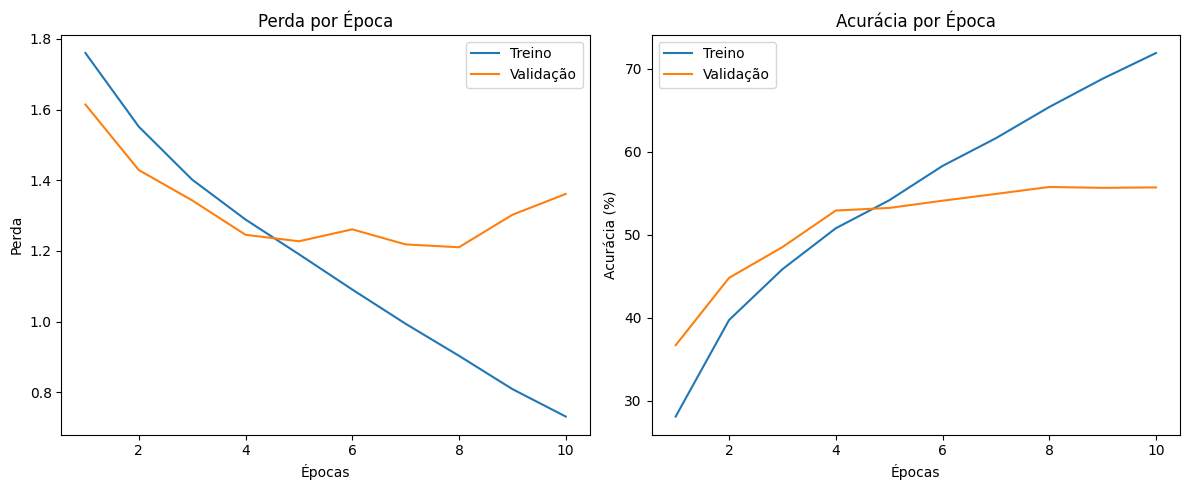

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchsummary import summary

class EmotionCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionCNN, self).__init__()

        # Camadas convolucionais
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)

        # Pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Camadas totalmente conectadas
        self.fc1 = nn.Linear(256 * 12 * 12, 128)  # Ajustado para 256 * 12 * 12
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)  # 7 classes para emoções

    def forward(self, x):
        # Camadas convolucionais com ReLU e pooling
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))

        # Verificar o shape antes do flatten (opcional para debug)
        # print(f"Shape antes do flatten: {x.shape}")

        # Flatten
        x = x.view(x.size(0), -1)

        # Camadas densas
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Caminhos do dataset
train_dir = '/content/drive/MyDrive/Visao-Computacional/FER2013/train'
test_dir = '/content/drive/MyDrive/Visao-Computacional/FER2013/test'

# Transformações mínimas
transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Escala de cinza
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])   # Normalização [-1, 1]
])

transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Carregar os dados usando ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
test_dataset = datasets.ImageFolder(test_dir, transform=transform_test)

# Dividir o conjunto de treino em treino e validação
val_ratio = 0.2
train_size = int((1 - val_ratio) * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

# Criar DataLoaders
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)  # Batch size maior
val_loader = DataLoader(val_data, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Definir o dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EmotionCNN(num_classes=7).to(device)

# Resumo do modelo
# summary(model, input_size=(128, 1, 48, 48))
summary(model, input_size=(1, 48, 48))  # (canal, altura, largura)

# Função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Função para avaliar o modelo
def evaluate_model(model, loader):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    return running_loss / len(loader), accuracy

# Loop de treinamento
num_epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total * 100)

    # Avaliação no conjunto de validação
    val_loss, val_accuracy = evaluate_model(model, val_loader)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Época {epoch+1}/{num_epochs}, Perda Treino: {train_losses[-1]:.4f}, "
          f"Perda Validação: {val_loss:.4f}, Acurácia Treino: {train_accuracies[-1]:.2f}%, "
          f"Acurácia Validação: {val_accuracy:.2f}%")

# Salvar o modelo treinado
torch.save(model.state_dict(), "emotion_cnn.pth")

# Gráficos de perda e acurácia
plt.figure(figsize=(12, 5))

# Perda
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Treino')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda por Época')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Treino')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.title('Acurácia por Época')
plt.legend()

plt.tight_layout()
plt.show()


# 2.0 Modelo Próprio com Mais uma camada convolucional



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 48, 48]             320
            Conv2d-2           [-1, 64, 48, 48]          18,496
         MaxPool2d-3           [-1, 64, 24, 24]               0
            Conv2d-4          [-1, 128, 24, 24]          73,856
            Conv2d-5          [-1, 256, 24, 24]         295,168
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Conv2d-7          [-1, 512, 12, 12]       1,180,160
         MaxPool2d-8            [-1, 512, 6, 6]               0
            Linear-9                  [-1, 128]       2,359,424
          Dropout-10                  [-1, 128]               0
           Linear-11                    [-1, 7]             903
Total params: 3,928,327
Trainable params: 3,928,327
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forw

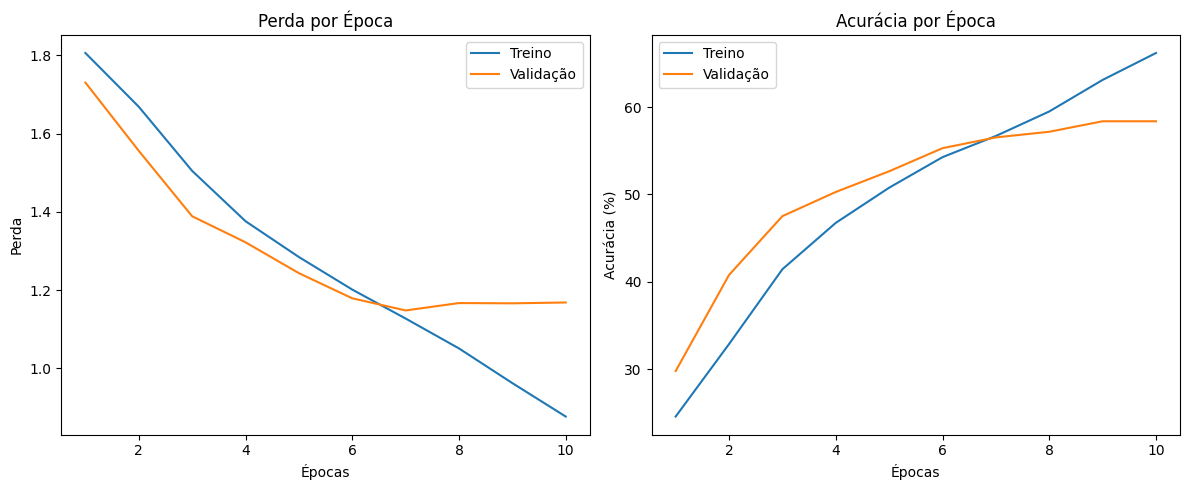

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchsummary import summary


class EmotionCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionCNN, self).__init__()

        # Camadas convolucionais
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)  # Nova camada

        # Pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Camadas totalmente conectadas
        self.fc1 = nn.Linear(512 * 6 * 6, 128)  # Ajustado para 512 * 6 * 6
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)  # 7 classes para emoções

    def forward(self, x):
        # Camadas convolucionais com ReLU e pooling
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))  # Aplicar pooling após a nova camada

        # Verificar o shape antes do flatten (opcional para debug)
        # print(f"Shape antes do flatten: {x.shape}")

        # Flatten
        x = x.view(x.size(0), -1)

        # Camadas densas
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Caminhos do dataset
train_dir = '/content/drive/MyDrive/Visao-Computacional/FER2013/train'
test_dir = '/content/drive/MyDrive/Visao-Computacional/FER2013/test'

# Transformações mínimas
transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Escala de cinza
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])   # Normalização [-1, 1]
])

transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Carregar os dados usando ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
test_dataset = datasets.ImageFolder(test_dir, transform=transform_test)

# Dividir o conjunto de treino em treino e validação
val_ratio = 0.2
train_size = int((1 - val_ratio) * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

# Criar DataLoaders
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)  # Batch size maior
val_loader = DataLoader(val_data, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Definir o dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EmotionCNN(num_classes=7).to(device)

# Resumo do modelo
summary(model, input_size=(1, 48, 48))

# Função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Função para avaliar o modelo
def evaluate_model(model, loader):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    return running_loss / len(loader), accuracy

# Loop de treinamento
num_epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total * 100)

    # Avaliação no conjunto de validação
    val_loss, val_accuracy = evaluate_model(model, val_loader)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Época {epoch+1}/{num_epochs}, Perda Treino: {train_losses[-1]:.4f}, "
          f"Perda Validação: {val_loss:.4f}, Acurácia Treino: {train_accuracies[-1]:.2f}%, "
          f"Acurácia Validação: {val_accuracy:.2f}%")

# Salvar o modelo treinado
torch.save(model.state_dict(), "emotion_cnn.pth")

# Gráficos de perda e acurácia
plt.figure(figsize=(12, 5))

# Perda
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Treino')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda por Época')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Treino')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.title('Acurácia por Época')
plt.legend()

plt.tight_layout()
plt.show()


# 2.1 Aumentando o número de épocas

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 48, 48]             320
            Conv2d-2           [-1, 64, 48, 48]          18,496
         MaxPool2d-3           [-1, 64, 24, 24]               0
            Conv2d-4          [-1, 128, 24, 24]          73,856
            Conv2d-5          [-1, 256, 24, 24]         295,168
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Conv2d-7          [-1, 512, 12, 12]       1,180,160
         MaxPool2d-8            [-1, 512, 6, 6]               0
            Linear-9                  [-1, 128]       2,359,424
          Dropout-10                  [-1, 128]               0
           Linear-11                    [-1, 7]             903
Total params: 3,928,327
Trainable params: 3,928,327
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forw

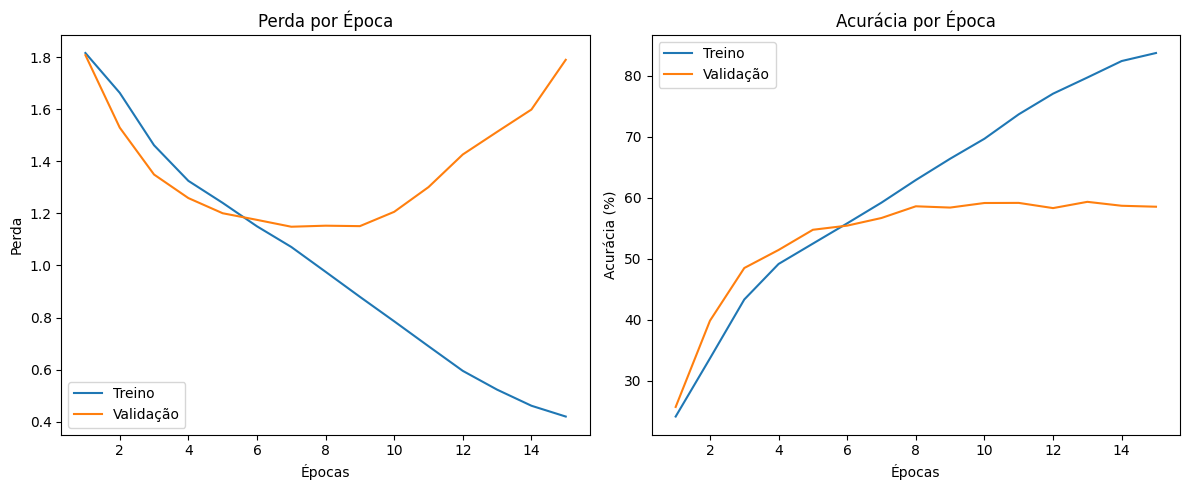

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchsummary import summary


class EmotionCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionCNN, self).__init__()

        # Camadas convolucionais
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)  # Nova camada

        # Pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Camadas totalmente conectadas
        self.fc1 = nn.Linear(512 * 6 * 6, 128)  # Ajustado para 512 * 6 * 6
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)  # 7 classes para emoções

    def forward(self, x):
        # Camadas convolucionais com ReLU e pooling
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))  # Aplicar pooling após a nova camada

        # Verificar o shape antes do flatten (opcional para debug)
        # print(f"Shape antes do flatten: {x.shape}")

        # Flatten
        x = x.view(x.size(0), -1)

        # Camadas densas
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Caminhos do dataset
train_dir = '/content/drive/MyDrive/Visao-Computacional/FER2013/train'
test_dir = '/content/drive/MyDrive/Visao-Computacional/FER2013/test'

# Transformações mínimas
transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Escala de cinza
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])   # Normalização [-1, 1]
])

transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Carregar os dados usando ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
test_dataset = datasets.ImageFolder(test_dir, transform=transform_test)

# Dividir o conjunto de treino em treino e validação
val_ratio = 0.2
train_size = int((1 - val_ratio) * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

# Criar DataLoaders
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)  # Batch size maior
val_loader = DataLoader(val_data, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Definir o dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EmotionCNN(num_classes=7).to(device)

# Resumo do modelo
summary(model, input_size=(1, 48, 48))

# Função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Função para avaliar o modelo
def evaluate_model(model, loader):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    return running_loss / len(loader), accuracy

# Loop de treinamento
num_epochs = 15
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total * 100)

    # Avaliação no conjunto de validação
    val_loss, val_accuracy = evaluate_model(model, val_loader)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Época {epoch+1}/{num_epochs}, Perda Treino: {train_losses[-1]:.4f}, "
          f"Perda Validação: {val_loss:.4f}, Acurácia Treino: {train_accuracies[-1]:.2f}%, "
          f"Acurácia Validação: {val_accuracy:.2f}%")

# Salvar o modelo treinado
torch.save(model.state_dict(), "emotion_cnn.pth")

# Gráficos de perda e acurácia
plt.figure(figsize=(12, 5))

# Perda
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Treino')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda por Época')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Treino')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.title('Acurácia por Época')
plt.legend()

plt.tight_layout()
plt.show()


# 3.0 mais outra camada convolucional para chegar ao shape de 3 X 3

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 48, 48]             320
            Conv2d-2           [-1, 64, 48, 48]          18,496
         MaxPool2d-3           [-1, 64, 24, 24]               0
            Conv2d-4          [-1, 128, 24, 24]          73,856
            Conv2d-5          [-1, 256, 24, 24]         295,168
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Conv2d-7          [-1, 512, 12, 12]       1,180,160
         MaxPool2d-8            [-1, 512, 6, 6]               0
            Conv2d-9            [-1, 512, 6, 6]       2,359,808
        MaxPool2d-10            [-1, 512, 3, 3]               0
           Linear-11                  [-1, 128]         589,952
          Dropout-12                  [-1, 128]               0
           Linear-13                    [-1, 7]             903
Total params: 4,518,663
Trainable param

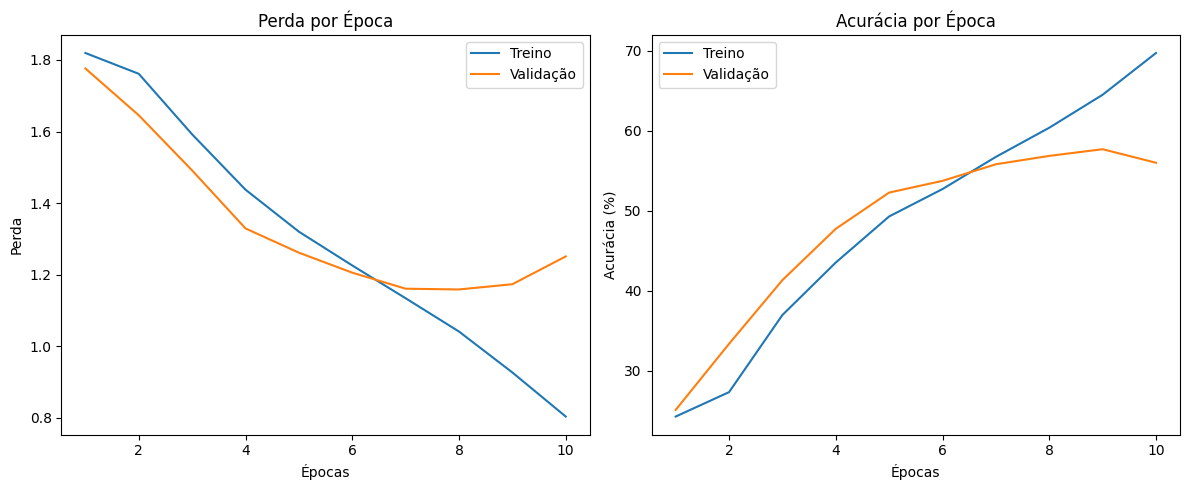

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchsummary import summary

class EmotionCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionCNN, self).__init__()

        # Camadas convolucionais
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)  # Camada adicional
        self.conv6 = nn.Conv2d(512, 512, kernel_size=3, padding=1)  # Nova camada para 3x3

        # Pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Camadas totalmente conectadas
        self.fc1 = nn.Linear(512 * 3 * 3, 128)  # Ajustado para 512 * 3 * 3
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)  # 7 classes para emoções

    def forward(self, x):
        # Camadas convolucionais com ReLU e pooling
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))  # Aplicar pooling após a nova camada
        x = self.pool(F.relu(self.conv6(x)))  # Pooling para reduzir para 3x3

        # Verificar o shape antes do flatten (opcional para debug)
        # print(f"Shape antes do flatten: {x.shape}")

        # Flatten
        x = x.view(x.size(0), -1)

        # Camadas densas
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Caminhos do dataset
train_dir = '/content/drive/MyDrive/Visao-Computacional/FER2013/train'
test_dir = '/content/drive/MyDrive/Visao-Computacional/FER2013/test'

# Transformações mínimas
transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Escala de cinza
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])   # Normalização [-1, 1]
])

transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Carregar os dados usando ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
test_dataset = datasets.ImageFolder(test_dir, transform=transform_test)

# Dividir o conjunto de treino em treino e validação
val_ratio = 0.2
train_size = int((1 - val_ratio) * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

# Criar DataLoaders
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)  # Batch size maior
val_loader = DataLoader(val_data, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Definir o dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EmotionCNN(num_classes=7).to(device)

# Resumo do modelo
summary(model, input_size=(1, 48, 48))

# Função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Função para avaliar o modelo
def evaluate_model(model, loader):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    return running_loss / len(loader), accuracy

# Loop de treinamento
num_epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total * 100)

    # Avaliação no conjunto de validação
    val_loss, val_accuracy = evaluate_model(model, val_loader)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Época {epoch+1}/{num_epochs}, Perda Treino: {train_losses[-1]:.4f}, "
          f"Perda Validação: {val_loss:.4f}, Acurácia Treino: {train_accuracies[-1]:.2f}%, "
          f"Acurácia Validação: {val_accuracy:.2f}%")

# Salvar o modelo treinado
torch.save(model.state_dict(), "emotion_cnn.pth")

# Gráficos de perda e acurácia
plt.figure(figsize=(12, 5))

# Perda
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Treino')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda por Época')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Treino')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.title('Acurácia por Época')
plt.legend()

plt.tight_layout()
plt.show()


# 4.0 MobileNetV3 - treinamento (COLAB)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt

# Caminho do dataset combinado
combined_dataset_dir = '/content/drive/MyDrive/Visao-Computacional/FER2013_Train_Port'

# Transformações para as imagens
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Converter para 3 canais para compatibilidade com MobileNetV3
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalização [-1, 1]
])

# Carregar o dataset combinado
combined_dataset = datasets.ImageFolder(combined_dataset_dir, transform=transform)

# Dividir o dataset em treino e validação
val_ratio = 0.2
train_size = int((1 - val_ratio) * len(combined_dataset))
val_size = len(combined_dataset) - train_size
train_data, val_data = random_split(combined_dataset, [train_size, val_size])

# Criar DataLoaders
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
val_loader = DataLoader(val_data, batch_size=128, shuffle=False)

# Definir o dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Carregar a MobileNetV3 pré-treinada
model = models.mobilenet_v3_small(pretrained=True)

# Ajustar a última camada para 7 classes (emoções)
model.classifier[3] = nn.Linear(model.classifier[3].in_features, 7)
model = model.to(device)

# Resumo do modelo
from torchsummary import summary
summary(model, input_size=(3, 48, 48), batch_size=1)

# Função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Função para avaliar o modelo
def evaluate_model(model, loader):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    return running_loss / len(loader), accuracy

# Loop de treinamento
num_epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total * 100)

    # Avaliação no conjunto de validação
    val_loss, val_accuracy = evaluate_model(model, val_loader)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Época {epoch+1}/{num_epochs}, Perda Treino: {train_losses[-1]:.4f}, "
          f"Perda Validação: {val_loss:.4f}, Acurácia Treino: {train_accuracies[-1]:.2f}%, "
          f"Acurácia Validação: {val_accuracy:.2f}%")

# Salvar o modelo treinado
torch.save(model.state_dict(), "/content/mobilenetv3_emocoes.pth")
print("Modelo salvo como mobilenetv3_emocoes.pth")

# Gráficos de perda e acurácia
plt.figure(figsize=(12, 5))

# Perda
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Treino')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda por Época')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Treino')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.title('Acurácia por Época')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [1, 16, 24, 24]             432
       BatchNorm2d-2            [1, 16, 24, 24]              32
         Hardswish-3            [1, 16, 24, 24]               0
            Conv2d-4            [1, 16, 12, 12]             144
       BatchNorm2d-5            [1, 16, 12, 12]              32
              ReLU-6            [1, 16, 12, 12]               0
 AdaptiveAvgPool2d-7              [1, 16, 1, 1]               0
            Conv2d-8               [1, 8, 1, 1]             136
              ReLU-9               [1, 8, 1, 1]               0
           Conv2d-10              [1, 16, 1, 1]             144
      Hardsigmoid-11              [1, 16, 1, 1]               0
SqueezeExcitation-12            [1, 16, 12, 12]               0
           Conv2d-13            [1, 16, 12, 12]             256
      BatchNorm2d-14            [1, 16,

KeyboardInterrupt: 

# 4.1 MobileNetV3 TREINAMENTO (COLAB) modificado
 - Erro, as imagens estão sendo utilizadas na resolução original de 48 X 48

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 63.4MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [1, 16, 24, 24]             432
       BatchNorm2d-2            [1, 16, 24, 24]              32
         Hardswish-3            [1, 16, 24, 24]               0
            Conv2d-4            [1, 16, 12, 12]             144
       BatchNorm2d-5            [1, 16, 12, 12]              32
              ReLU-6            [1, 16, 12, 12]               0
 AdaptiveAvgPool2d-7              [1, 16, 1, 1]               0
            Conv2d-8               [1, 8, 1, 1]             136
              ReLU-9               [1, 8, 1, 1]               0
           Conv2d-10              [1, 16, 1, 1]             144
      Hardsigmoid-11              [1, 16, 1, 1]               0
SqueezeExcitation-12            [1, 16, 12, 12]               0
           Conv2d-13            [1, 16, 12, 12]             256
      BatchNorm2d-14            [1, 16,

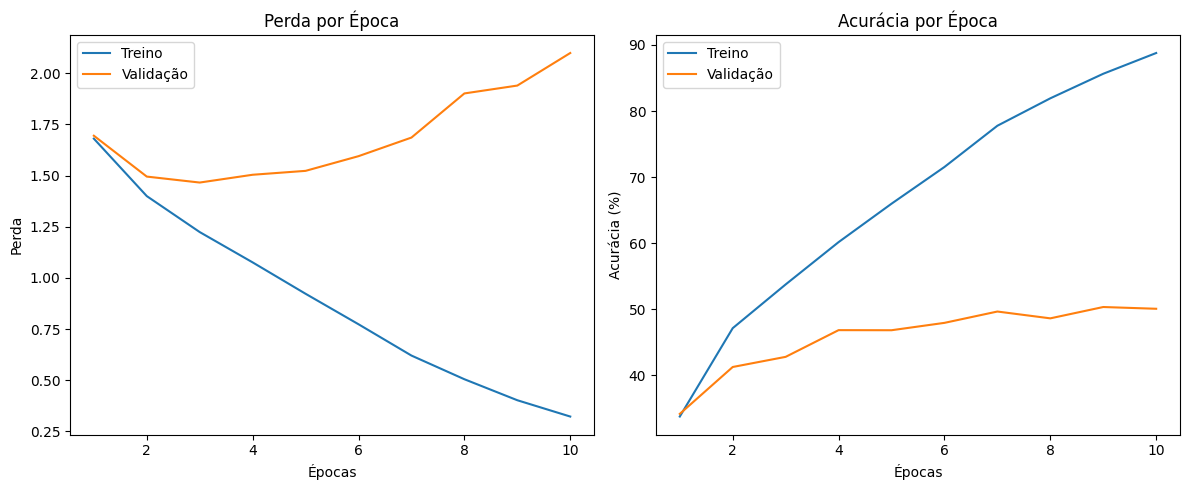

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import time

# Caminho do dataset combinado
combined_dataset_dir = '/content/drive/MyDrive/Visao-Computacional/FER2013_Train_Port'

# Transformações para as imagens
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Converter para 3 canais para compatibilidade com MobileNetV3
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalização [-1, 1]
])

# Carregar o dataset combinado
combined_dataset = datasets.ImageFolder(combined_dataset_dir, transform=transform)

# Dividir o dataset em treino e validação
val_ratio = 0.2
train_size = int((1 - val_ratio) * len(combined_dataset))
val_size = len(combined_dataset) - train_size
train_data, val_data = random_split(combined_dataset, [train_size, val_size])

# Criar DataLoaders
train_loader = DataLoader(train_data, batch_size=256, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=256, shuffle=False, num_workers=4)

# Definir o dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Carregar a MobileNetV3 pré-treinada
model = models.mobilenet_v3_small(pretrained=True)

# Ajustar a última camada para 7 classes (emoções)
model.classifier[3] = nn.Linear(model.classifier[3].in_features, 7)
model = model.to(device)

# Resumo do modelo
from torchsummary import summary
summary(model, input_size=(3, 48, 48), batch_size=1)

# Função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Função para avaliar o modelo
def evaluate_model(model, loader):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    return running_loss / len(loader), accuracy

# Loop de treinamento
num_epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    start_time = time.time() # para medir o tempo das épocas
    torch.cuda.synchronize()

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total * 100)

    # Avaliação no conjunto de validação
    val_loss, val_accuracy = evaluate_model(model, val_loader)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    torch.cuda.synchronize()
    end_time = time.time()

    print(f"Época {epoch+1}/{num_epochs}, Perda Treino: {train_losses[-1]:.4f}, "
          f"Perda Validação: {val_loss:.4f}, Acurácia Treino: {train_accuracies[-1]:.2f}%, "
          f"Acurácia Validação: {val_accuracy:.2f}%, "
          f"Tempo: {end_time - start_time:.2f} segundos")

# Salvar o modelo treinado
torch.save(model.state_dict(), "/content/drive/MyDrive/mobilenetv3_emocao.pth")
print("Modelo salvo como mobilenetv3_emocao.pth")

# Gráficos de perda e acurácia
plt.figure(figsize=(12, 5))

# Perda
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Treino')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda por Época')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Treino')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.title('Acurácia por Época')
plt.legend()

plt.tight_layout()
plt.show()


# 4.2 Raspberry 4: Código do Modelo MobileNetV3 (INFERENCIA RASP 4)

In [ ]:
#-------------------------------------------------------------------------------
# CÓDIGO PARA RASPBERRY 4 4GB (VSCODE + PYTHON + OPENCV + PYTORCH)
#-------------------------------------------------------------------------------

import torch
import torch.nn as nn
# import torchvision.transforms as transforms
from torchvision import models, transforms
import cv2
from PIL import Image

# Configurar o dispositivo para CPU
device = torch.device("cpu")

# Classes das emoções (em português)
emotion_classes = [ "FELIZ" , "NOJO" , "RAIVA", "SURPRESA" , "MEDO", "TRISTE" , "NEUTRO" ]


# Carregar o modelo MobileNetV3 Small
num_classes = len(emotion_classes)
model = models.mobilenet_v3_small(pretrained=False)
model.classifier[3] = nn.Linear(model.classifier[3].in_features, num_classes)

# Carregar os pesos salvos
model.load_state_dict(torch.load("/home/gaspar-rasp4/pyt/mobilenet/mobilenetv3_epoch16.pth", map_location=device))
model = model.to(device)
model.eval()

# Transformação para pré-processamento da imagem
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionar após o crop
    transforms.Grayscale(num_output_channels=3), #Garantir 3 canais para MobileNetV3
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Função para realizar crop central
def crop_center(frame, target_size):
    h, w, _ = frame.shape
    crop_size = min(h, w, target_size)  # Garante que o crop não extrapole a imagem
    start_x = (w - crop_size) // 2
    start_y = (h - crop_size) // 2
    return frame[start_y:start_y + crop_size, start_x:start_x + crop_size]

# Função para realizar predição em uma imagem
def predict(frame):
    # Realizar o crop central 720x720
    cropped_frame = crop_center(frame, 720)

    # Converter o frame (OpenCV) para formato PIL
    #image = Image.fromarray(cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2RGB))

    # Converter o frame para tons de cinza
    gray_frame = cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2GRAY)

    # Converter o frame (OpenCV) para formato PIL e adicionar 3 canais
    image = Image.fromarray(gray_frame).convert("RGB")

    # Pré-processar a imagem
    input_tensor = preprocess(image).unsqueeze(0).to(device)


    # Realizar a predição
    with torch.no_grad():
        output = model(input_tensor)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)

    # Retornar a classe com maior probabilidade e sua confiança
    predicted_idx = probabilities.argmax().item()
    confidence = probabilities[predicted_idx].item()
    predicted_emotion = emotion_classes[predicted_idx]

    return predicted_emotion, confidence

# Inicializar a webcam com OpenCV
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

if not cap.isOpened():
    print("Erro ao acessar a webcam.")
    exit()

print("Pressione 'q' para sair.")

# Loop principal para capturar frames e realizar predições
while True:
    ret, frame = cap.read()
    if not ret:
        print("Erro ao capturar o frame.")
        break

    # Fazer a predição
    predicted_emotion, confidence = predict(frame)

    # Exibir a classe e a confiança no frame
    cv2.putText(
        frame,
        f"Emocao: {predicted_emotion}, Conf: {confidence:.2f}",
        (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 255, 0),
        2
    )

    # Mostrar o frame com informações
    cv2.imshow("Real-Time Emotion Classification", frame)


    # Sair ao pressionar 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar os recursos
cap.release()
cv2.destroyAllWindows()

# 4.3 Código de treinamento (COLAB) com as seguintes modificações:
 - Imagens estão sendo redimensionadas para 224 X 224 a fim de ficar coerente com o modelo MobileNetV3 original
 - Juntando o dataset de Teste para aumentar o número de imagens, separando
 Treinamento 80% e Validação 20%
 - Tentativa de melhorar o balanceamento de classes usando o WeightedRandomSampler


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 82.2MB/s]


Treinando o modelo...
Epoch 1/25, Train Loss: 1.0920, Train Acc: 0.5892, Val Loss: 1.3007, Val Acc: 0.5005, Time: 777.23 seconds
Pesos salvos em: /content/drive/MyDrive/Visao-Computacional/PesosTreino/mobilenetv3_epoch1.pth
Epoch 2/25, Train Loss: 0.8266, Train Acc: 0.6906, Val Loss: 1.0777, Val Acc: 0.6040, Time: 89.29 seconds
Pesos salvos em: /content/drive/MyDrive/Visao-Computacional/PesosTreino/mobilenetv3_epoch2.pth
Epoch 3/25, Train Loss: 0.7370, Train Acc: 0.7227, Val Loss: 1.0687, Val Acc: 0.6234, Time: 87.45 seconds
Pesos salvos em: /content/drive/MyDrive/Visao-Computacional/PesosTreino/mobilenetv3_epoch3.pth
Epoch 4/25, Train Loss: 0.6533, Train Acc: 0.7609, Val Loss: 1.2656, Val Acc: 0.5917, Time: 87.89 seconds
Pesos salvos em: /content/drive/MyDrive/Visao-Computacional/PesosTreino/mobilenetv3_epoch4.pth
Epoch 5/25, Train Loss: 0.5929, Train Acc: 0.7848, Val Loss: 1.0902, Val Acc: 0.6342, Time: 87.49 seconds
Pesos salvos em: /content/drive/MyDrive/Visao-Computacional/PesosTr

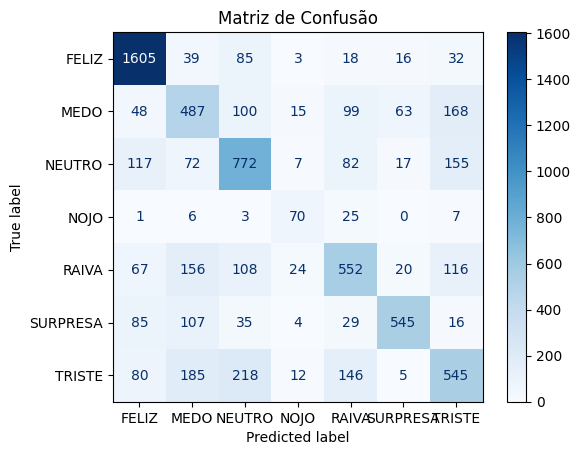

Plotando métricas...


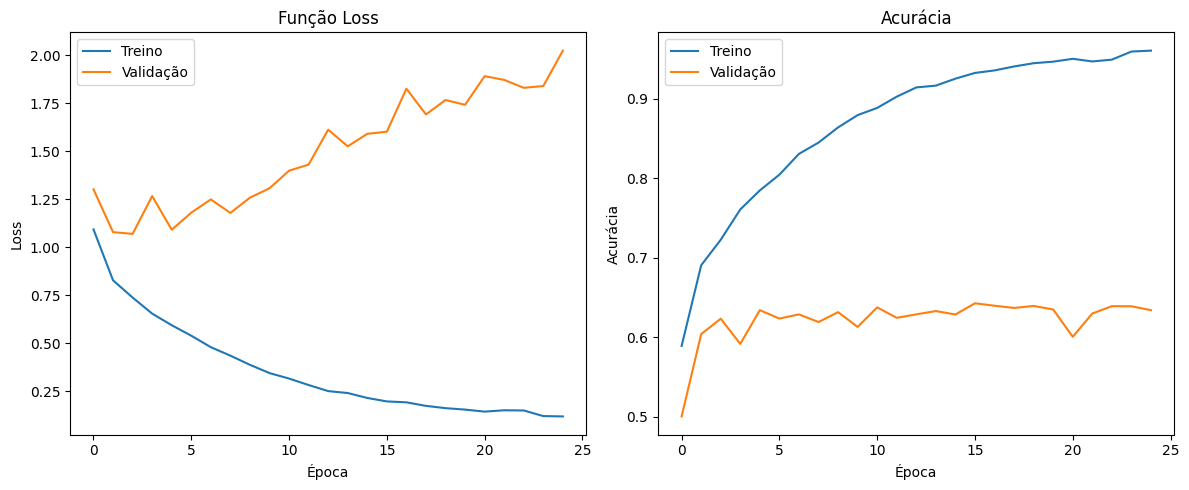

In [ ]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, WeightedRandomSampler, random_split
from torchvision import datasets, transforms, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Configurações gerais
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 7  # FER2013 possui 7 emoções
batch_size = 64
epochs = 25
split_ratio = 0.8  # Porcentagem de dados para treino
output_dir = "/content/drive/MyDrive/Visao-Computacional/PesosTreino"

# Garantir que o diretório de saída exista
os.makedirs(output_dir, exist_ok=True)

# Transformações
data_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Converter tons de cinza para 3 canais
    transforms.Resize((224, 224)),               # Redimensionar para 224x224
    transforms.RandomHorizontalFlip(),           # Data augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Carregar dataset combinado
data_dir = "/content/drive/MyDrive/Visao-Computacional/FER2013_Train_Port"
full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Divisão do dataset combinado em treino e validação
train_size = int(len(full_dataset) * split_ratio)
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Balanceamento de classes usando pesos
class_counts = np.bincount([label for _, label in train_dataset])
class_weights = 1.0 / class_counts
sample_weights = [class_weights[label] for _, label in train_dataset]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Modelo MobileNetV3
model = models.mobilenet_v3_small(pretrained=True)
model.classifier[3] = nn.Linear(model.classifier[3].in_features, num_classes)
model = model.to(device)

# Função de perda e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Listas para armazenar os valores de loss e acurácia
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Função para calcular acurácia
def calculate_accuracy(outputs, labels):
    _, preds = torch.max(outputs, 1)
    correct = (preds == labels).sum().item()
    return correct / labels.size(0)

# Função para treinar o modelo
def train_model():
    for epoch in range(epochs):
        start_time = time.time()

        # Modo de treinamento
        model.train()
        running_loss, running_corrects = 0.0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Estatísticas
            running_loss += loss.item() * inputs.size(0)
            running_corrects += (outputs.argmax(1) == labels).sum().item()

        # Estatísticas de treino
        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = running_corrects / len(train_dataset)
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        # Modo de validação
        model.eval()
        val_loss, val_corrects = 0.0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                val_corrects += (outputs.argmax(1) == labels).sum().item()

        # Estatísticas de validação
        val_loss /= len(val_dataset)
        val_acc = val_corrects / len(val_dataset)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        epoch_time = time.time() - start_time
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Time: {epoch_time:.2f} seconds")

        # Salvar pesos do modelo para cada época
        model_path = os.path.join(output_dir, f"mobilenetv3_epoch{epoch+1}.pth")
        torch.save(model.state_dict(), model_path)
        print(f"Pesos salvos em: {model_path}")

# Avaliar o modelo e gerar matriz de confusão
def evaluate_model():
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Gerar matriz de confusão
    cm = confusion_matrix(all_labels, all_preds, labels=list(range(num_classes)))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=full_dataset.classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Matriz de Confusão")
    plt.show()

# Função para plotar gráficos
def plot_metrics():
    plt.figure(figsize=(12, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Treino")
    plt.plot(val_losses, label="Validação")
    plt.title("Função Loss")
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.legend()

    # Acurácia
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Treino")
    plt.plot(val_accuracies, label="Validação")
    plt.title("Acurácia")
    plt.xlabel("Época")
    plt.ylabel("Acurácia")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Executar o treinamento e avaliação
if __name__ == "__main__":
    print("Treinando o modelo...")
    train_model()

    print("Avaliando o modelo...")
    evaluate_model()

    print("Plotando métricas...")
    plot_metrics()
